 #                                             Lumber

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# read data and start data cleaning job

In [4]:
dataset = pd.read_csv('data.csv')

In [5]:
dataset.head(3)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...


In [6]:
# remove unwanted column

In [7]:
del dataset["Unnamed: 13"]

In [8]:
dataset

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [9]:
dataset.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [10]:
dataset.shape

(310, 13)

In [11]:
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [12]:
dataset.rename(columns={"Col1":"pelvic_incidence","Col2":"pelvic_tilt","Col3":"lumbar_lordosis_angle","Col4":" sacral_slope","Col5":"pelvic_radius","Col6":"degree_spondylolisthesis","Col7":"pelvic_slope","Col8":"Direct_tilt","Col9":"thoracic_slope","Col10":" cervical_tilt","Col11":"sacrum_angle","Col12":"scoliosis_slope","Class_att":"class"},inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3    sacral_slope             310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9    cervical_tilt            310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<AxesSubplot:>

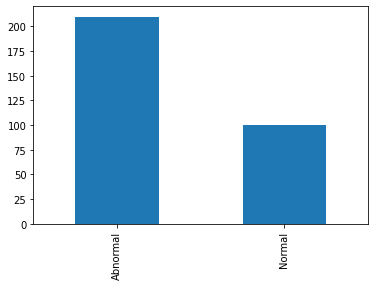

In [16]:
dataset['class'].value_counts().sort_index().plot.bar()

In [17]:
dataset.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


<AxesSubplot:>

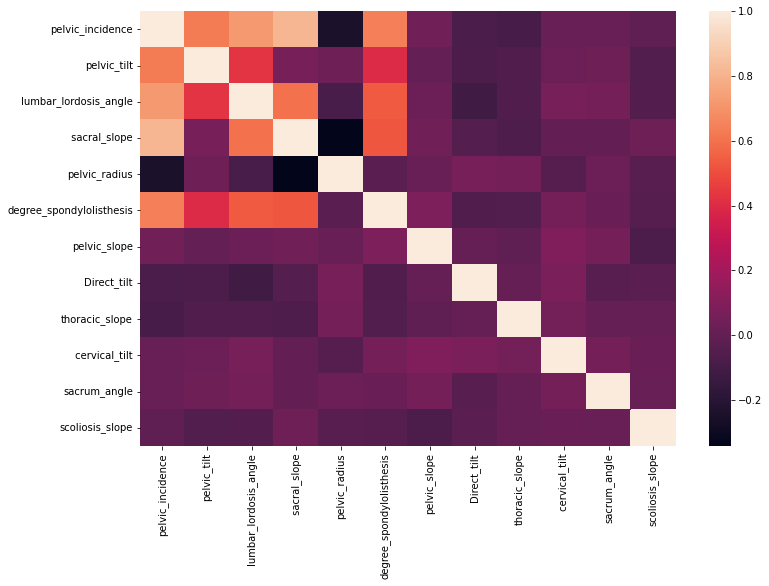

In [18]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr())

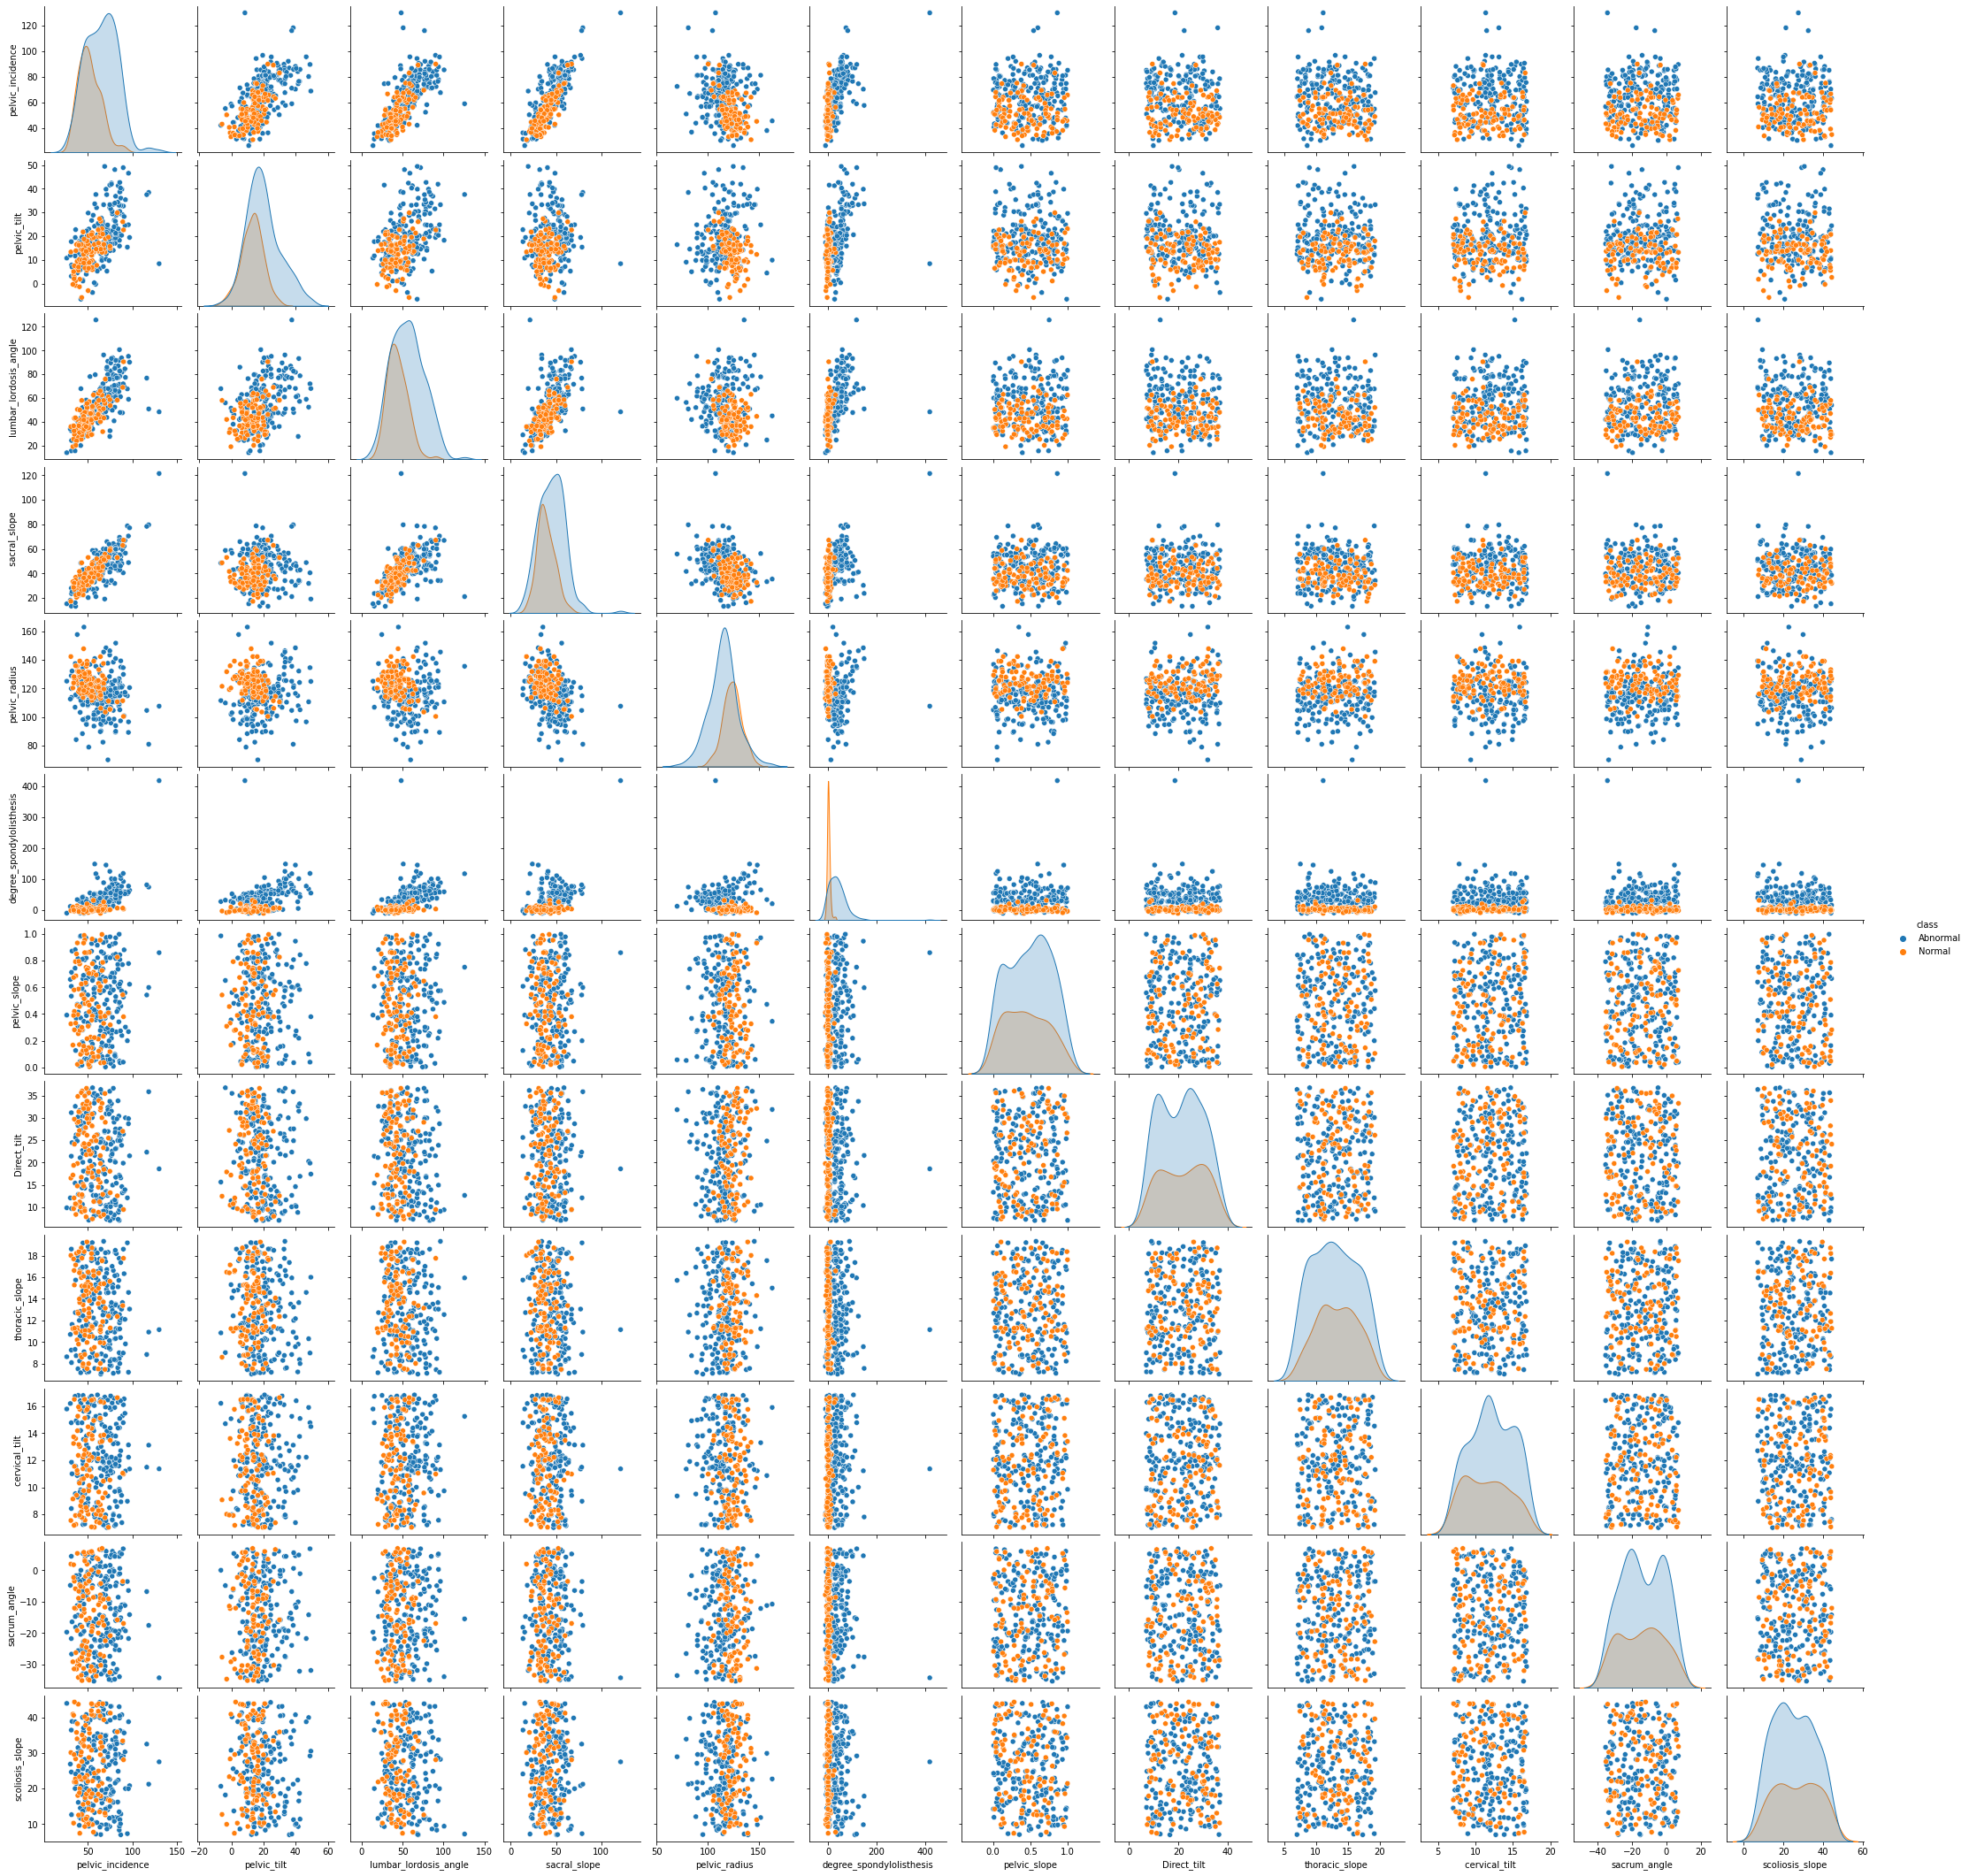

In [19]:
sns.pairplot(dataset,hue="class")

array([[<AxesSubplot:title={'center':'pelvic_incidence'}>,
        <AxesSubplot:title={'center':'pelvic_tilt'}>,
        <AxesSubplot:title={'center':'lumbar_lordosis_angle'}>],
       [<AxesSubplot:title={'center':' sacral_slope'}>,
        <AxesSubplot:title={'center':'pelvic_radius'}>,
        <AxesSubplot:title={'center':'degree_spondylolisthesis'}>],
       [<AxesSubplot:title={'center':'pelvic_slope'}>,
        <AxesSubplot:title={'center':'Direct_tilt'}>,
        <AxesSubplot:title={'center':'thoracic_slope'}>],
       [<AxesSubplot:title={'center':' cervical_tilt'}>,
        <AxesSubplot:title={'center':'sacrum_angle'}>,
        <AxesSubplot:title={'center':'scoliosis_slope'}>]], dtype=object)

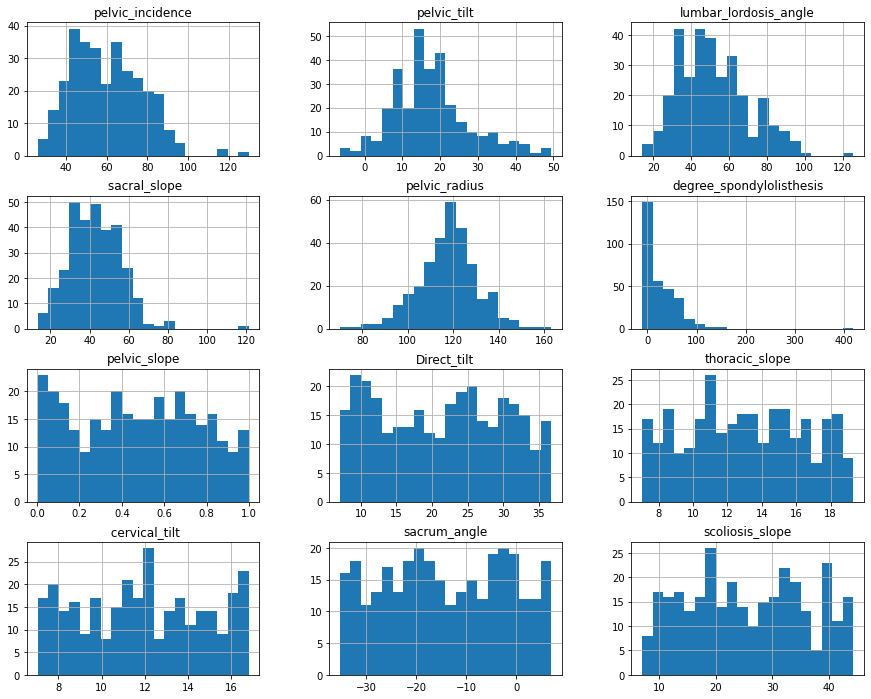

In [20]:
dataset.hist(figsize=(15,12),bins=20)

In [ ]:
# outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, ' sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'Direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, ' cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

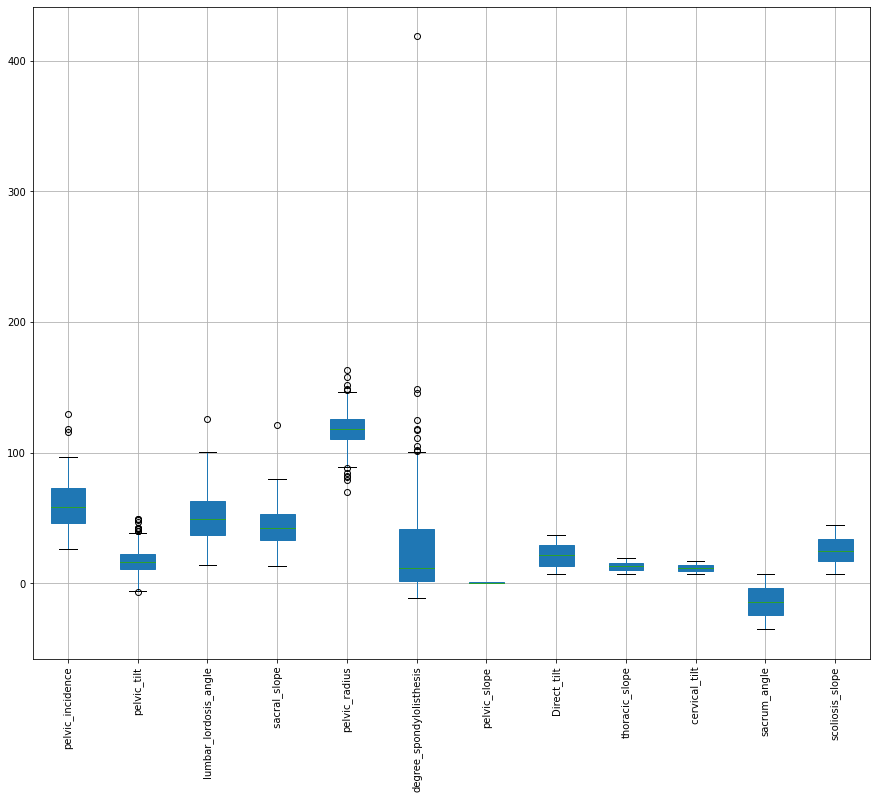

In [21]:

plt.subplots(figsize=(15,12))
dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)

In [22]:
min=0
max=0
def detect_outlier(feature):
    first_quartile=np.percentile(feature,25)
    third_quartile=np.percentile(feature,75)
    IQR=third_quartile-first_quartile
    IQR *= 1.5
    min=first_quartile-IQR
    max=third_quartile+IQR
    flag=False
    
    if(min>np.min(feature)):
        flag=True
    if(max<np.max(feature)):
        flag=True
    return flag

In [23]:
def remove_outlier(feature):
    first_quartile=np.percentile(X[feature],25)
    third_quartile=np.percentile(X[feature],75)
    IQR=third_quartile-first_quartile
    IQR *= 1.5
    min=first_quartile-IQR
    max=third_quartile+IQR
    
    median=X[feature].median()
    X.loc[X[feature]<min,feature]=median
    X.loc[X[feature]>max,feature]=median
    
X=dataset.iloc[:,:-1]
for i in range(len(X.columns)):
    remove_outlier(X.columns[i])
    

In [24]:
X=dataset.iloc[:,:-1]

In [25]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i]," outlier exist")

pelvic_incidence  outlier exist
pelvic_tilt  outlier exist
lumbar_lordosis_angle  outlier exist
 sacral_slope  outlier exist
pelvic_radius  outlier exist
degree_spondylolisthesis  outlier exist


In [26]:
for i in range(3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, ' sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'Direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, ' cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

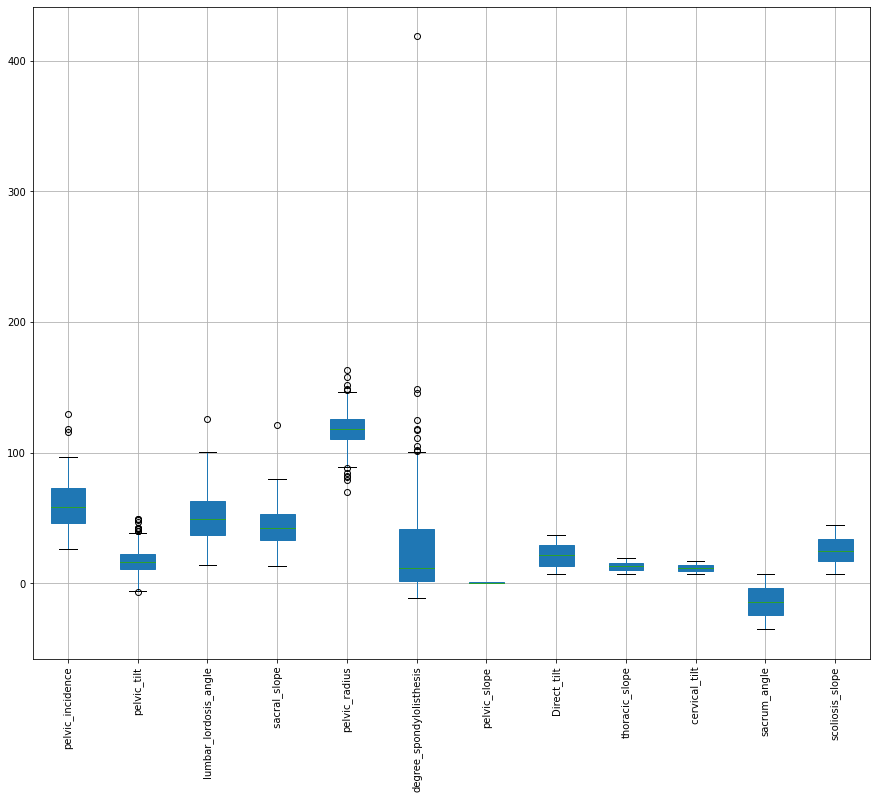

In [27]:
plt.subplots(figsize=(15,12))
dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, ' sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'Direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, ' cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

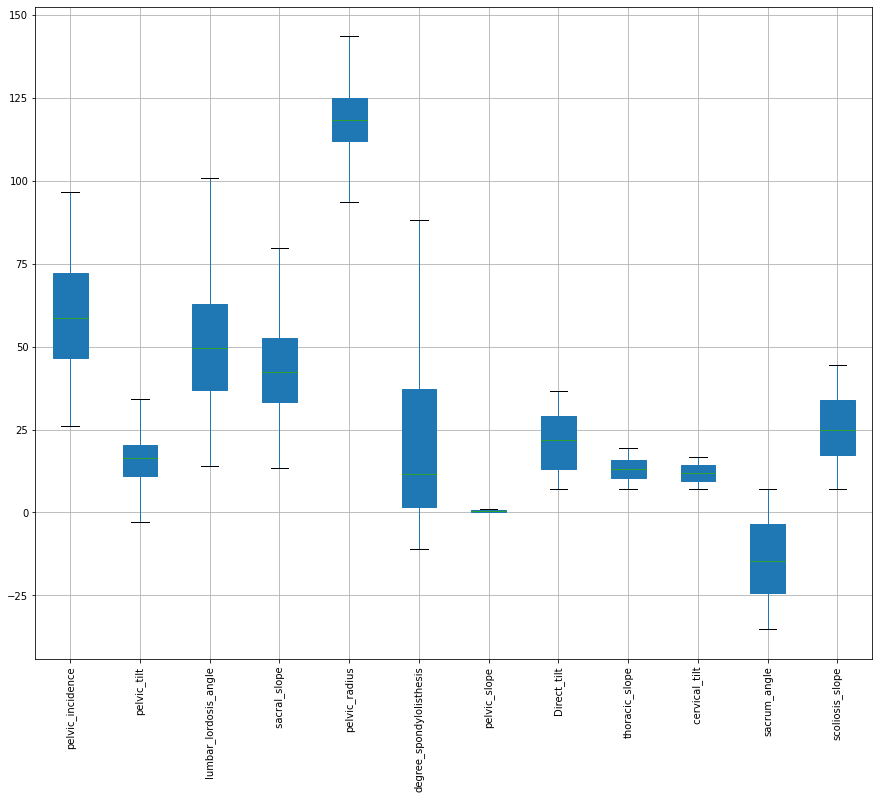

In [28]:
plt.subplots(figsize=(15,12))
X.boxplot(patch_artist=True)
plt.xticks(rotation=90)

In [29]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [30]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(X)
scaled_df=pd.DataFrame(data=scaled_data,columns=X.columns)

In [31]:
scaled_df.shape

(310, 12)

In [32]:
label=dataset["class"]
encoder=LabelEncoder()
label=encoder.fit_transform(label)

In [33]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
X=scaled_df
y=label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
y.shape

(310,)

In [36]:
X_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
21,0.408052,0.644627,0.325094,0.308921,0.632073,0.135777,0.172783,0.540167,0.584534,0.726355,0.924474,0.479998
101,0.762886,0.583249,0.568474,0.720622,0.423011,0.499166,0.708781,0.143572,0.316143,0.014440,0.014995,0.567204
235,0.535837,0.615357,0.301773,0.461213,0.388496,0.000000,0.410881,0.428924,0.334237,0.096309,0.650216,0.602711
45,0.351223,0.697009,0.380429,0.219067,0.475853,0.085865,0.317379,0.794561,0.942545,0.871092,0.895052,0.064905
89,0.638764,0.720641,0.342347,0.511452,0.524835,0.385893,0.400782,0.070754,0.787827,0.000000,0.724570,0.201603
...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.207051,0.128901,0.415013,0.385123,0.913502,0.118023,0.275159,0.140291,0.772346,0.891265,0.165720,0.011371
192,0.685315,0.972430,0.610324,0.419414,0.492816,0.229732,0.056409,0.897839,0.436343,0.304807,0.187828,0.212223
117,0.849438,0.518433,0.390474,0.511452,0.569513,0.735172,0.032131,0.690614,0.404535,0.265247,0.967609,0.784340
47,0.215639,0.524326,0.192591,0.171996,0.392522,0.066025,0.983351,0.748015,0.786956,0.955718,0.752329,0.201402


In [37]:
X_test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
300,0.347879,0.252985,0.242091,0.465085,0.459123,0.109134,0.018037,0.395654,0.078885,0.277098,0.805945,0.194111
145,0.843801,0.518433,0.746455,0.446080,0.229641,0.542933,0.844785,0.333150,0.079203,0.822197,0.810019,0.118042
302,0.403526,0.656071,0.177075,0.297677,0.494322,0.096489,0.963922,0.801847,0.356660,0.693798,0.702350,0.309201
222,0.424849,0.431220,0.560695,0.446726,0.451915,0.425031,0.713776,0.072067,0.777018,0.966256,0.631636,0.019963
52,0.341256,0.877931,0.254818,0.106781,0.693831,0.169071,0.028042,0.979783,0.565911,0.600488,0.114930,0.661393
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.527822,0.616792,0.616741,0.451886,0.748109,0.489282,0.658691,0.915863,0.256914,0.826284,0.865278,0.881926
59,0.311467,0.480157,0.248601,0.298690,0.608886,0.191286,0.622791,0.894027,0.581001,0.902750,0.894234,0.430401
34,0.474371,0.937965,0.375359,0.214545,0.514115,0.126132,0.475959,0.053104,0.103205,0.153864,0.834331,0.899315
269,0.155897,0.521747,0.115281,0.109938,0.628095,0.185433,0.851662,0.124589,0.909809,0.243829,0.091337,0.770786


In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.score(X_test,y_test)

0.7741935483870968

In [43]:
def predict_result(list):
    flag=int(model.predict([list])[0])
    if flag==1:
        print("Normal")
    else:
        print("Abnormal")

In [47]:
import pickle
with open("LowerBackPain.pickle",'wb') as f:
    pickle.dump(model,f)